<a href="https://colab.research.google.com/github/sjdoescoding/CE889/blob/main/Rewrite_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Code Adapted from
https://heartbeat.comet.ml/building-a-neural-network-from-scratch-using-python-part-1-6d399df8d432
'''

'Code Adapted from\nhttps://heartbeat.comet.ml/building-a-neural-network-from-scratch-using-python-part-1-6d399df8d432\n'

In [2]:
# Importing Libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Google Drive
# from zipfile import ZipFile
  
from google.colab import drive #mounting to drive
drive.mount('/content/drive', force_remount=True)


df = pd.read_csv('/content/drive/MyDrive/CE889/ce889_dataCollection.csv')

Mounted at /content/drive


In [3]:
df.rename(columns = {'X':'X_dist', 'Y':'y_dist','Z':'X_vel','O ': 'y_vel'}, inplace = True)

In [22]:
X = df[['X_dist','y_dist']]
y = df[['X_vel', 'y_vel']]

# x1 = df['X_dist'].values.reshape(-1,1)
# x2 = df['y_dist'].values.reshape(-1,1)
# y1 = df['X_vel'].values.reshape(-1,1)
# y2 = df['y_vel'].values.reshape(-1,1)

In [20]:
X = np.squeeze(np.array(X))
y = np.squeeze(np.array(y))

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


In [17]:
class NeuralNet():       
    def __init__(self, layers=[2,8,2], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None

    def init_weights(self):
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1'] = np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)           

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    #deriv of sigmoid
    def dsigmoid(self, Z):
        return self.sigmoid(Z) * (1 - self.sigmoid(Z))

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

    #loss function 
    def root_mean_squared_error(self, y, yhat):
      diff = yhat - y
      differences_squared = diff ** 2
      mean_diff = differences_squared.mean()
      loss = np.sqrt(mean_diff)
      return loss 

    #feedforward model
    def forward_propagation(self):
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.root_mean_squared_error(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    #computes the derivatives and updates weights and bias
    def back_propagation(self,yhat):
  
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dsigmoid(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2


    #training the model 
    def fit(self, X, y):

        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias

        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)


    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 


    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

<ipython-input-17-ca9c3ed9540f>:20: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


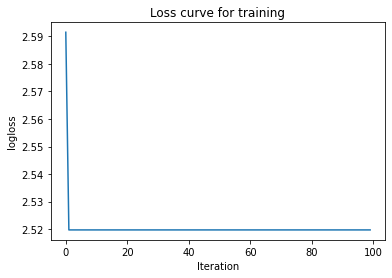

In [26]:
nn = NeuralNet() # create the NN model
nn.fit(X, y) #train the model
nn.plot_loss()